In [1]:
!pip install pandas
import pandas as pd

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Цей дата сет взято із [kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams). Він складається з оцінок з різних предметів, отриманих студентами з США. Дослідимо вплив різних факторів на успішність студентів, а саме - рівень освіти батьків, проходження курсу підготовки до тесту, прийом ланчу. Знайдемо моду, медіану та середнє значення оцінок з усіх трьох предметів, обчислимо кількість студентів в розподілі за статтю та групами, де вони навчаються, структуру оцінок серед студентів та інші статистичні дані. Зробимо візуалізацію та проаналізуємо графіки. Далі використаємо кілька моделей для прогнозування, чи здадуть студенти кожний предмет мінімум на 60 балів (саме така оцінка вважається прийнятною за традиційною шкалою для того, щоб предмет був зарахований) і отримають в сумі 180 балів і більше за всі 3 предмети.
Пізніше порахуємо метрики для всіх моделей, щоб визначити їхню ефективність та прийняти рішення,які з них будуть найбільш доцільними для використання.

In [4]:
rows, columns = df.shape

print("Кількість рядків:", rows)
print("Кількість стовпців:", columns)

Кількість рядків: 1000
Кількість стовпців: 8


Подивимося на загальну структуру нашого DataFrame і дізнаємося про типи даних, які він містить, кількість ненульових значень у кожному стовпці та обсяг пам'яті, який використовується для зберігання даних.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Обчислимо статистичні показники для кожного числового стовпця нашого DataFrame, такі як кількість ненульових значень (count), середнє значення (mean), стандартне відхилення (std), мінімальне значення (min), 25-й, 50-й (медіана) та 75-й квартилі. 

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df = df.dropna() #видалимо пропущені рядки

In [8]:
df.isnull().sum() #обчислимо кількість пропущених значень у кожному стовпці

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.duplicated().sum() #підрахуємо кількість дубльованих рядків

0

In [10]:
!pip install openpyxl

In [11]:
df_for_excel = df.head(10)

In [12]:
df_for_excel.to_excel('StudentsPerformance.xlsx', index=False)

In [13]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### Підрахуємо кількість студентів за статтю

In [14]:
df.groupby('gender').agg({'gender': 'count'}).rename(columns={'gender': 'Amount_students'}).reset_index()

,gender,Amount_students
0,female,518
1,male,482


Всього навчається 1000 студентів. З них 518 жінок та 482 чоловіків.

#### Знайдемо середнє значення оцінок з математики, читання та письма в залежності від статі

In [15]:
df_gender_scores = round (df.groupby('gender').agg({'reading score': 'mean', 'math score': 'mean', 'writing score': 'mean'}).reset_index())

In [16]:
df_gender_scores

,gender,reading score,math score,writing score
0,female,73.0,64.0,72.0
1,male,65.0,69.0,63.0


У жінок середній бал з читання та письма був вищий, ніж у чоловіків і складав 73 бали. А середній бал з математики був вищий у чоловіків і склав 69 балів.

#### Знайдемо медіану оцінок з математики, читання та письма в залежності від статі

In [17]:
df_gender_scores = df.groupby('gender').agg({'reading score': 'median', 'math score': 'median', 'writing score': 'median'}).reset_index()

In [18]:
df_gender_scores

,gender,reading score,math score,writing score
0,female,73.0,65.0,74.0
1,male,66.0,69.0,64.0


Отримані дані свідчать про те ж саме - середня успішність з читання та письма вища у жінок, а з математики - у чоловіків.

#### Знайдемо моду оцінок з математики, читання та письма в залежності від статі

In [19]:
female_data = df[df['gender'] == 'female']
male_data = df[df['gender'] == 'male']

In [20]:
mode_reading_female = female_data['reading score'].mode().values
mode_math_female = female_data['math score'].mode().values
mode_writing_female = female_data['writing score'].mode().values

mode_reading_male = male_data['reading score'].mode().values
mode_math_male = male_data['math score'].mode().values
mode_writing_male = male_data['writing score'].mode().values

print("Мода оцінок з читання для жінок:", mode_reading_female)
print("Мода оцінок з математики для жінок:", mode_math_female)
print("Мода оцінок з письма для жінок:", mode_writing_female)

print("Мода оцінок з читання для чоловіків:", mode_reading_male)
print("Мода оцінок з математики для чоловіків:", mode_math_male)
print("Мода оцінок з письма для чоловіків:", mode_writing_male)

Мода оцінок з читання для жінок: [72]
Мода оцінок з математики для жінок: [65]
Мода оцінок з письма для жінок: [70]
Мода оцінок з читання для чоловіків: [66 74]
Мода оцінок з математики для чоловіків: [62]
Мода оцінок з письма для чоловіків: [68]


#### Підрахуємо скільки студентів пройшли і скільки не пройшли курс підготовки до тесту

In [21]:
test_preparation_course_counts = df['test preparation course'].value_counts().to_dict()

In [22]:
test_preparation_course_counts

{'none': 642, 'completed': 358}

358 студентів пройшли курс підготовки до тестів, а 640 не проходили.

#### Визначимо, чи впливає проходження курсу підготовки до тесту на успішність студентів

In [23]:
df['average score'] = (df['reading score'] + df['math score'] + df['writing score']) / 3

In [24]:
average_scores_by_prep_course = round (df.groupby('test preparation course')['average score'].mean()).to_dict()

In [25]:
average_scores_by_prep_course

{'completed': 73.0, 'none': 65.0}

Середній бал з усіх предметів був вищий у студентів, які проходили курс підготовки до тестів, ніж у тих, які його не проходили.

#### Визначимо кількість студентів, які склали на високий бал (більше 90) всі 3 предмети

In [26]:
high_scores = df[(df['reading score'] > 90) & (df['math score'] > 90) & (df['writing score'] > 90)]

In [27]:
num_high_scores = len(high_scores)

In [28]:
num_high_scores

23

Всього 23 студенти показали високий результат.

#### Визначимо кількість студентів, які склали на низький бал (менше 60) всі 3 предмети

In [29]:
low_scores = df[(df['reading score'] < 60) & (df['math score'] < 60) & (df['writing score'] < 60)]

In [30]:
num_low_scores = len(low_scores)

In [31]:
num_low_scores

190

190 студентів мають низьку успішність.

#### Відсортуємо кількість студентів за рівнем освіти їхніх батьків

In [32]:
education_counts = df['parental level of education'].value_counts()

In [33]:
sorted_education_counts = education_counts.sort_values(ascending=False).to_dict()

In [34]:
sorted_education_counts

{'some college': 226,
 "associate's degree": 222,
 'high school': 196,
 'some high school': 179,
 "bachelor's degree": 118,
 "master's degree": 59}

Батьки 226 студентів навчалися в коледжі, 222 мають диплом асоційованого ступеня, 195 мають закінчену середню освіту, 178 навчаються у школі, 118 мають ступінь бакалавра, а 89 - ступінь магістра.

#### Підрахуємо скільки студентів в кожній групі

In [35]:
ethnicity_counts = df['race/ethnicity'].value_counts()

In [71]:
sorted_ethnicity_counts = ethnicity_counts.sort_index(ascending=False)

In [72]:
sorted_ethnicity_counts

group E    140
group D    262
group C    319
group B    190
group A     89
Name: race/ethnicity, dtype: int64

Найбільше студентів навчається у групі С (319 осіб), а найменше - у групі А (89 осіб).

#### Визначимо у якій групі найбільша кількість батьків студентів мають диплом магістра

In [38]:
masters_students = df[df['parental level of education'] == "master's degree"]

In [39]:
most_common_ethnicity = masters_students['race/ethnicity'].value_counts().idxmax()

In [40]:
most_common_ethnicity

'group D'

#### Визначимо у якій групі найвища успішність серед студентів

In [41]:
df['average score'] = (df['reading score'] + df['math score'] + df['writing score']) / 3
average_scores_by_group = df.groupby('race/ethnicity')['average score'].mean()

In [42]:
highest_average_group = average_scores_by_group.idxmax()

In [43]:
highest_average_group

'group E'

#### Скільки студентів мали стандартний ланч, а скільки free/reduced?

In [44]:
lunch_counts = df['lunch'].value_counts().to_dict()

In [45]:
lunch_counts

{'standard': 645, 'free/reduced': 355}

645 студентів мали стандартний ланч, а 353 не брали або брали зменшену порцію.

#### Визначимо чи впливає споживання ланчу на успішність студентів

In [46]:
df['average score'] = (df['reading score'] + df['math score'] + df['writing score']) / 3

In [47]:
average_scores_by_lunch = round (df.groupby('lunch')['average score'].mean()).to_dict()

In [48]:
average_scores_by_lunch

{'free/reduced': 62.0, 'standard': 71.0}

У студентів, які мали стандартний ланч середній бал з 3 предметів вищий (71 бал), ніж у тих, що не вживали ланч або брали його зменшену порцію.

#### Підрахуємо, які оцінки отримували студенти в середньому із трьох предметів. Оцінка А - 90 балів і більше, В - 80 балів і більше, С - 70 балів і більше, D - 60 балів і більше, F - менше 60 балів.

In [49]:
def GetOverallGrade(row):
    average_score = (row['math score'] + row['reading score'] + row['writing score']) / 3
    if average_score >= 90:
        return 'A'
    elif average_score >= 80:
        return 'B'
    elif average_score >= 70:
        return 'C'
    elif average_score >= 60:
        return 'D'
    else:
        return 'F'

# Застосуйте функцію GetOverallGrade до кожного рядка для розрахунку загальних оцінок
df['Grade'] = df.apply(GetOverallGrade, axis=1)

# Підрахуйте кількість кожної оцінки
grade_counts = df['Grade'].value_counts()

# Відобразіть результат
print(grade_counts)

F    285
C    261
D    256
B    146
A     52
Name: Grade, dtype: int64


In [50]:
!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Відобразимо розподіл числових даних і виявимо, чи є викиди (вибіркові аномалії) за допомогою ящикової діаграми

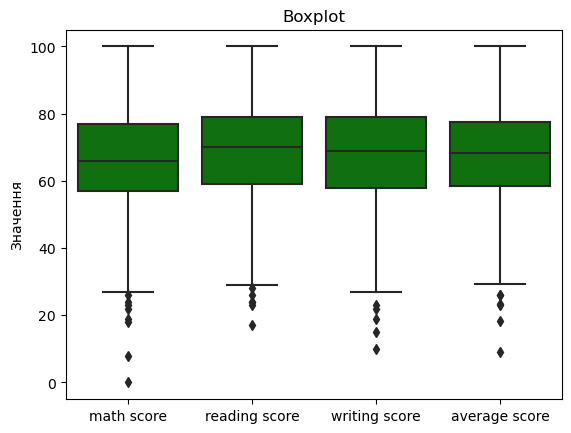

In [51]:
sns.boxplot(data=df, color='green')

plt.title('Boxplot')
plt.ylabel('Значення')

plt.show()

Ми можемо, помітити, що у нас є викиди в оцінках з математики, тому побудуємо нові ящикові діаграми з фільтрацією даних та видаленням викидів.

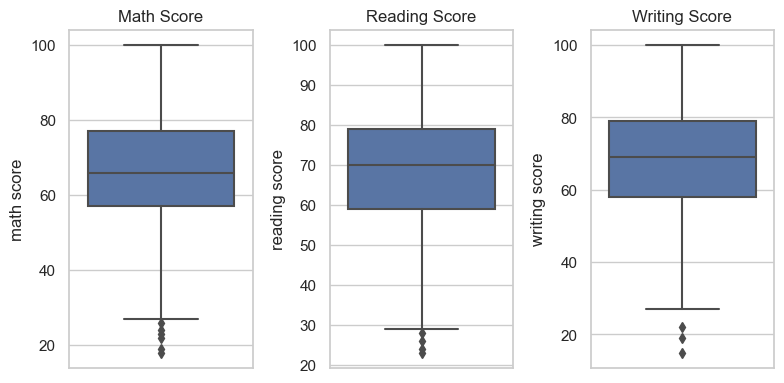

In [52]:
# Фільтруємо рядки, де оцінки з математики більше 10
df_filtered = df[df['math score'] > 10]

# Побудуємо вертикальні ящикові діаграми для всіх трьох предметів
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 4))  

plt.subplot(1, 3, 1)  # Перший підграфік для 'math score'
sns.boxplot(y=df_filtered['math score'])
plt.title('Math Score')

plt.subplot(1, 3, 2)  # Другий підграфік для 'reading score'
sns.boxplot(y=df_filtered['reading score'])
plt.title('Reading Score')

plt.subplot(1, 3, 3)  # Третій підграфік для 'writing score'
sns.boxplot(y=df_filtered['writing score'])
plt.title('Writing Score')

plt.tight_layout()  
plt.show()

#### Зробимо візуалізацію даних

In [53]:
gender_counts = df['gender'].value_counts()

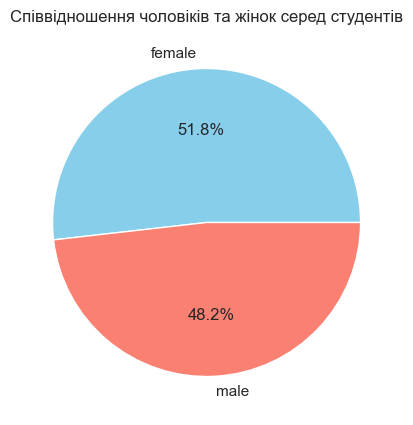

In [54]:
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Співвідношення чоловіків та жінок серед студентів')
plt.show()

У групах майже порівно чоловіків та жінок. Жінок трохи більше - 51,8%.

In [55]:
group_counts = df['race/ethnicity'].value_counts()

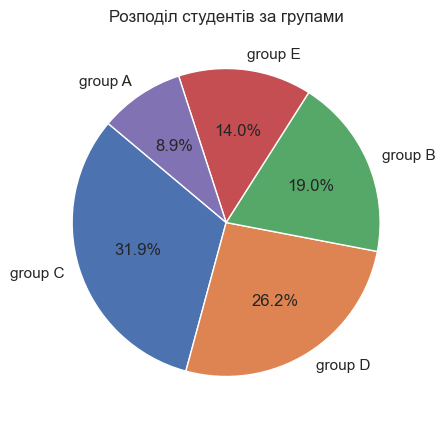

In [56]:
plt.figure(figsize=(5, 5))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Розподіл студентів за групами')
plt.show()

Найбільше студентів навчається у групі С - 31,9% від загальної кількості, а найменше - у групі (8,9%).

In [57]:
education_counts = df['parental level of education'].value_counts()

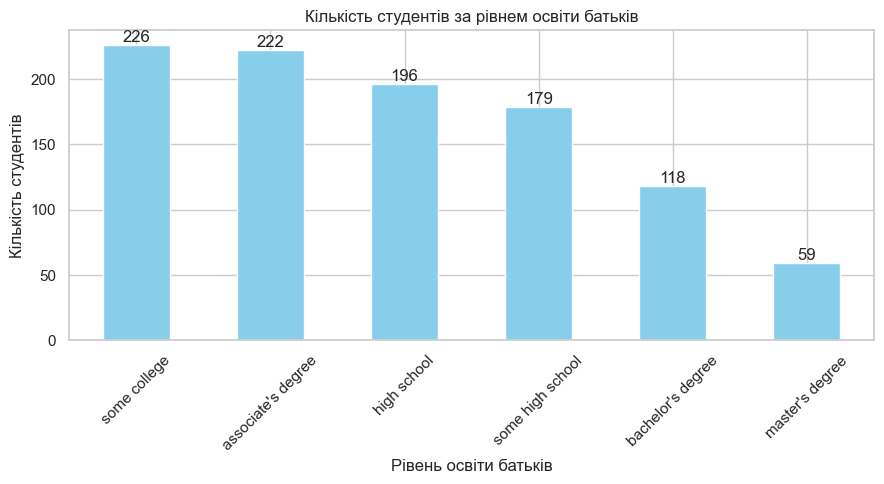

In [73]:
plt.figure(figsize=(9, 5))
education_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Рівень освіти батьків')
plt.ylabel('Кількість студентів')
plt.title('Кількість студентів за рівнем освіти батьків')
plt.xticks(rotation=45)  # Повернемо підписи осі X для кращої читабельності

for i, count in enumerate(education_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Найбільша кількість батьків студентів ще навчаються в коледжі (226 осіб), 222 особи мають диплом асоційованого ступеня та 196 осіб мають середню освіту. Найменша кількість батьків студентів мають ступінь магістра - лише 59 осіб.

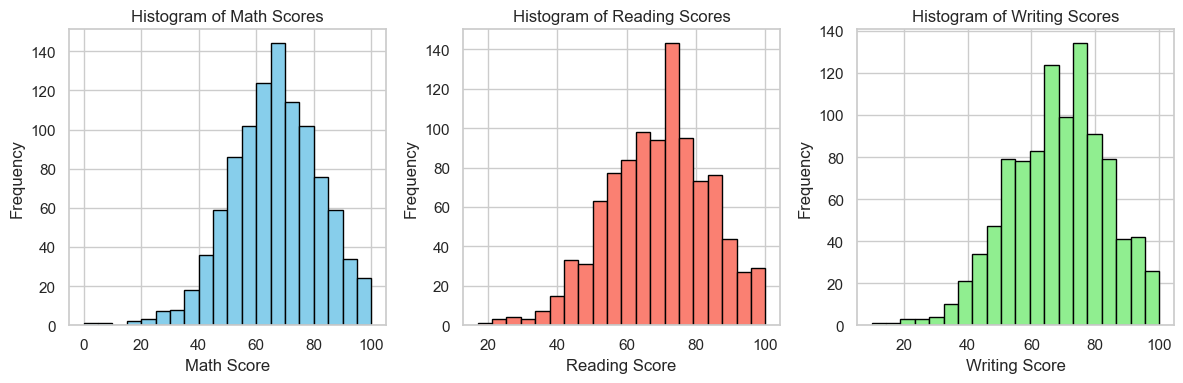

In [59]:
# Створимо графік гістограми для кожного типу оцінки
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['math score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Histogram of Math Scores')

plt.subplot(1, 3, 2)
plt.hist(df['reading score'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Histogram of Reading Scores')

plt.subplot(1, 3, 3)
plt.hist(df['writing score'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.title('Histogram of Writing Scores')

plt.tight_layout()
plt.show()

Дані графіки показують оцінки з кожного предмету та їх частоту. З математики найчастіше траплялися оцінки в діапазоні - 65-70 балів, з читання - 70-75 балів, з письма - 75-80 балів.

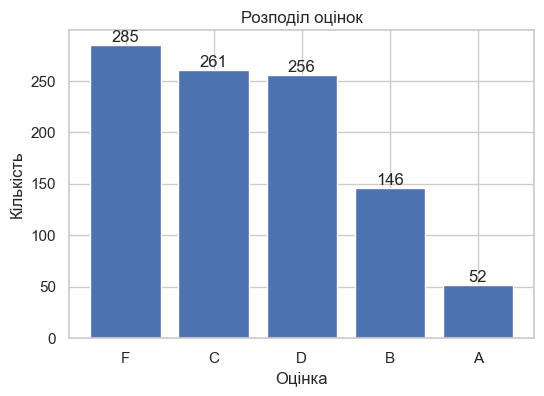

In [78]:
import matplotlib.pyplot as plt

оцінки = ['F', 'C', 'D', 'B', 'A']
кількості = [285, 261, 256, 146, 52]

plt.figure(figsize=(6, 4))
plt.bar(оцінки, кількості)

for i in range(len(оцінки)):
    plt.text(оцінки[i], кількості[i], str(кількості[i]), ha='center', va='bottom')

plt.xlabel('Оцінка')
plt.ylabel('Кількість')
plt.title('Розподіл оцінок')
plt.show()

Ми вже  обрахували ці дані вище. Тепер побудуємо на їхній основі барчар. Найбільше оцінок припадає на категорію F(менше 60 балів). Багато оцінок також з категорій С і D (від 60 до 79 балів). І лише 52 людини отримали оцінку А - 90 балів та більше.

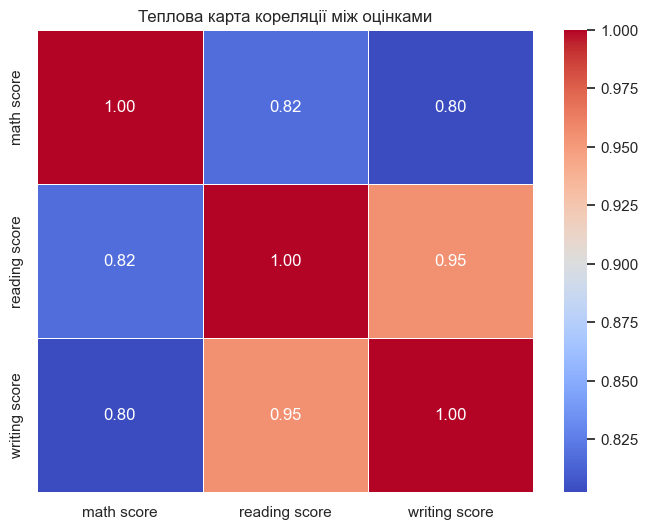

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


# Оцінки учнів (math score, reading score, writing score) - цілі дані для теплової карти
scores_data = df[['math score', 'reading score', 'writing score']]

# Обчислення матриці кореляції між оцінками
correlation_matrix = scores_data.corr()

# Створення теплової карти
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Теплова карта кореляції між оцінками')
plt.show()

Існує певний взаємозв'язок та залежність між оцінками з читання та письма. Оцінки з математики майже не пов'язані з іншими предметами.

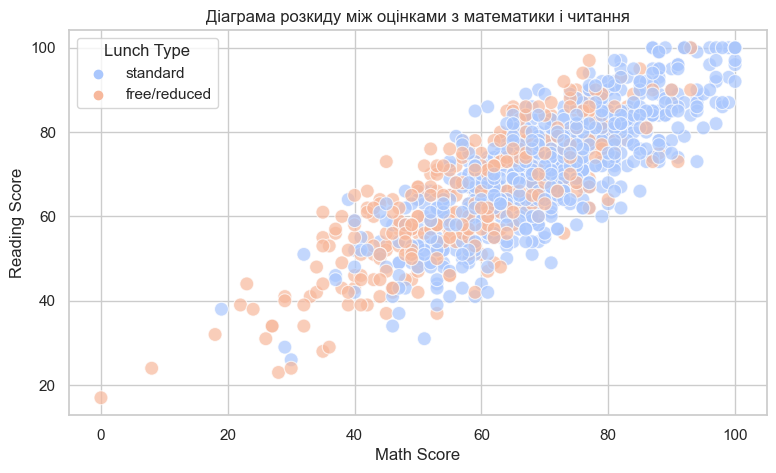

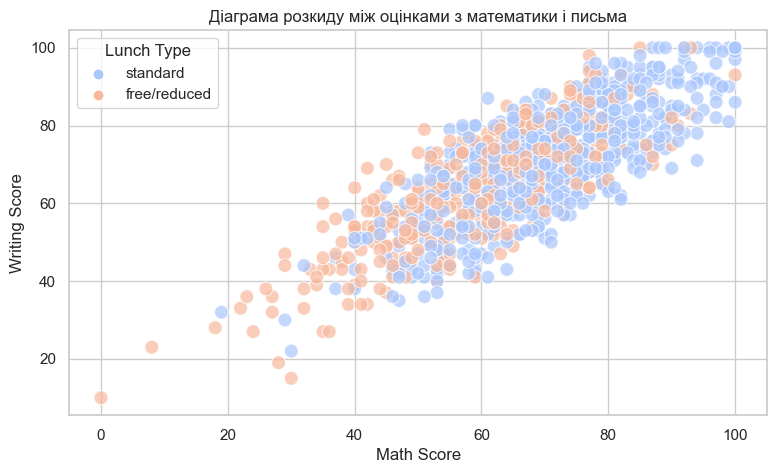

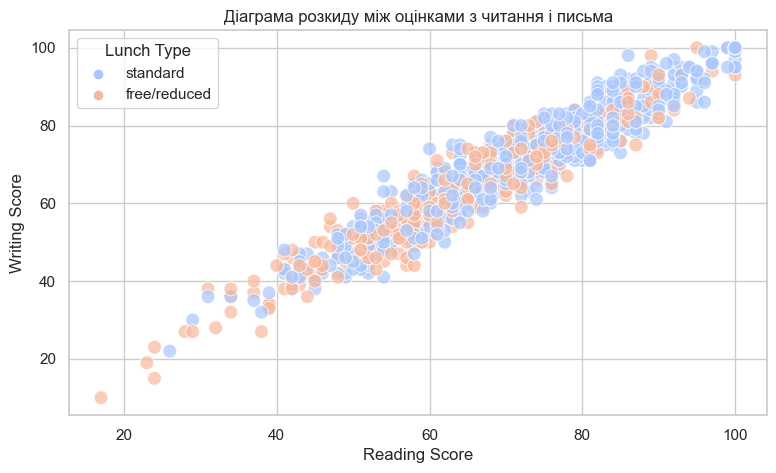

In [61]:
# Побудуємо діаграми розкиду для оцінок з трьох предметів та споживанням ланчу
plt.figure(figsize=(9, 5))
sns.scatterplot(x='math score', y='reading score', hue='lunch', data=df, palette='coolwarm', alpha=0.7, s=100)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Діаграма розкиду між оцінками з математики і читання')
plt.legend(title='Lunch Type')
plt.show()

plt.figure(figsize=(9, 5))
sns.scatterplot(x='math score', y='writing score', hue='lunch', data=df, palette='coolwarm', alpha=0.7, s=100)
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Діаграма розкиду між оцінками з математики і письма')
plt.legend(title='Lunch Type')
plt.show()

plt.figure(figsize=(9, 5))
sns.scatterplot(x='reading score', y='writing score', hue='lunch', data=df, palette='coolwarm', alpha=0.7, s=100)
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Діаграма розкиду між оцінками з читання і письма')
plt.legend(title='Lunch Type')
plt.show()

Точки на всіх графіках розташовані вздовж діагоналі, це вказує на позитивну кореляцію між змінними (збільшення однієї змінної супроводжується збільшенням іншої). 
Широкий розкид точок (графік 1 та графік 2) може вказувати на значну варіабельність в даних, тоді як більш концентрований розкид (графік 3) може свідчити про більш стійку залежність між змінними.

In [62]:
!pip install scikit-learn 

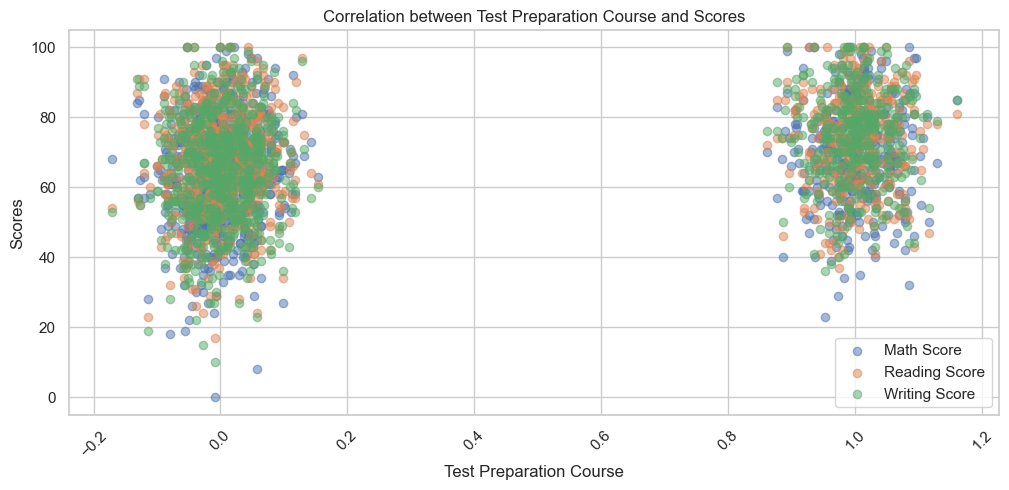

In [63]:
df['test preparation course'] = df['test preparation course'].apply(lambda x: 1 if x == 'completed' else 0)

# Задамо змінні x і y з розкидом для графіка
x = df['test preparation course'] + np.random.normal(0, 0.05, len(df))
y_math = df['math score']
y_reading = df['reading score']
y_writing = df['writing score']

# Побудуємо графік розподілу оцінок відносно курсу проходження тесту
plt.figure(figsize=(12, 5))
plt.scatter(x, y_math, label='Math Score', alpha=0.5)
plt.scatter(x, y_reading, label='Reading Score', alpha=0.5)
plt.scatter(x, y_writing, label='Writing Score', alpha=0.5)
plt.xlabel('Test Preparation Course')
plt.ylabel('Scores')
plt.legend()
plt.title('Correlation between Test Preparation Course and Scores')
plt.xticks(rotation=45)
plt.show()

Точки на графіку розташувані у формі хмари. Це свідчить, що залежність між проходженням курсу підготовки до тесту та оцінками майже відсутня.

#### Лінійна регресія

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("StudentsPerformance.csv")
# Визначаємо цільову змінну
X = df[['math score', 'reading score', 'writing score']]
y = X.sum(axis=1)  # Загальна оцінка як сума оцінок з трьох предметів

# Розділимо на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудуємо і навчимо модель лінійної регресії
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Оцінка моделі
y_pred = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error: 4.322326671886968e-28
R-squared (R2) Score: 1.0
Mean Absolute Error (MAE): 8.260059303211165e-15


За допомогою моделі лінійної регресії спрогнозуємо загальні оцінки студентів на основі їх оцінок з математики, читання і письма. 
MSE, R2 та MAE мають відносно малі значення, що вказує на високу точність моделі.
Ця модель дуже добре підходить для прогнозування загальних оцінок студентів.

#### Логістична регресія

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# Завантажуємо дані
df = pd.read_csv("StudentsPerformance.csv")

# Визначаємо цільову змінну
df['Pass'] = (df['math score'] + df['reading score'] + df['writing score']) >= 180

# Кодуємо категоріальні змінні
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['race/ethnicity'] = label_encoder.fit_transform(df['race/ethnicity'])
df['parental level of education'] = label_encoder.fit_transform(df['parental level of education'])
df['lunch'] = label_encoder.fit_transform(df['lunch'])
df['test preparation course'] = label_encoder.fit_transform(df['test preparation course'])

# Розділяємо на тренувальний і тестовий набори
X = df.drop(columns=['Pass'])
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудуємо і навчимо модель логістичної регресії
model = LogisticRegression()
model.fit(X_train, y_train)

# Оцінка моделі
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

       False       0.95      0.98      0.97        62
        True       0.99      0.98      0.99       138

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



#### Дерево рішень

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("StudentsPerformance.csv")

# Визначаємо цільову змінну
df['Pass'] = (df['math score'] + df['reading score'] + df['writing score']) >= 180
# Кодуємо категоріальні змінні
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

# Розділяємо на тренувальний і тестовий набори
X = df.drop(columns=['Pass'])
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудуємо і навчимо модель дерева рішень
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Оцінка моделі
y_pred = tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.955
              precision    recall  f1-score   support

       False       0.91      0.95      0.93        62
        True       0.98      0.96      0.97       138

    accuracy                           0.95       200
   macro avg       0.94      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200



#### Bootsrap – (bagging)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Завантаження даних
df = pd.read_csv("StudentsPerformance.csv")

# Визначення цільової змінної
df['Pass'] = (df['math score'] + df['reading score'] + df['writing score']) >= 180

# Кодування категоріальних змінних
dа = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

# Розділення на тренувальний і тестовий набори
X = dа.drop(columns=['Pass'])
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова та навчання Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Оцінка моделі
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

       False       0.95      0.98      0.97        62
        True       0.99      0.98      0.99       138

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



#### Stacking

In [68]:
from sklearn.linear_model import LogisticRegression

# Завантаження даних
df = pd.read_csv("StudentsPerformance.csv")

# Визначення цільової змінної
df['Pass'] = (df['math score'] + df['reading score'] + df['writing score']) >= 180


# Кодування категоріальних змінних
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

# Розділення на тренувальний і тестовий набори
X = df.drop(columns=['Pass'])
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання базових моделей
base_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
base_model2 = LogisticRegression(random_state=42)

base_model1.fit(X_train, y_train)
base_model2.fit(X_train, y_train)

# Прогнози базових моделей
pred1 = base_model1.predict(X_test)
pred2 = base_model2.predict(X_test)

# Використання прогнозів базових моделей для навчання фінальної моделі
stacked_model = LogisticRegression(random_state=42)
stacked_model.fit(pd.DataFrame({'Model1': pred1, 'Model2': pred2}), y_test)

# Прогнози фінальної моделі
final_pred = stacked_model.predict(pd.DataFrame({'Model1': pred1, 'Model2': pred2}))

# Оцінка моделі стекінгу
accuracy = accuracy_score(y_test, final_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.99
              precision    recall  f1-score   support

       False       0.95      0.98      0.97        62
        True       0.99      0.98      0.99       138

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



#### Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

# Завантаження даних
df = pd.read_csv("StudentsPerformance.csv")

# Визначаємо цільову змінну
df['Pass'] = (df['math score'] + df['reading score'] + df['writing score']) >= 200

# Кодування категоріальних змінних
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)

# Розділення на тренувальний і тестовий набори
X = df.drop(columns=['Pass'])
y = df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделі Gradient Boosting
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)

# Прогнози моделі Gradient Boosting
y_pred = boosting_model.predict(X_test)

# Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.995
              precision    recall  f1-score   support

       False       1.00      0.99      0.99        93
        True       0.99      1.00      1.00       107

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



#### Визначимо метрики всіх моделей та порівняємо їхню ефективність

In [82]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd
import time  # Import the time module

# Assuming you have already defined X_train, y_train, X_test, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_models = [LinearRegression(), GradientBoostingRegressor(), RandomForestRegressor(), DecisionTreeRegressor()]
classification_models = [LogisticRegression(), GradientBoostingClassifier(), DecisionTreeClassifier()]
rows = []

for clf in regression_models:
    print(f'\n{clf.__class__.__name__} (Regression)')
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    y_pred = clf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_test))

    rows.append([clf.__class__.__name__ + ' (Regression)', round(rmse, 4)])

for clf in classification_models:
    print(f'\n{clf.__class__.__name__} (Classification)')
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    rows.append([clf.__class__.__name__ + ' (Classification)', round(accuracy, 4)])

model_df = pd.DataFrame(rows, columns=['Model name', 'Metric'])
print(model_df)


LinearRegression (Regression)

GradientBoostingRegressor (Regression)

RandomForestRegressor (Regression)

DecisionTreeRegressor (Regression)

LogisticRegression (Classification)

GradientBoostingClassifier (Classification)

DecisionTreeClassifier (Classification)
                                    Model name  Metric
0                LinearRegression (Regression)  0.3054
1       GradientBoostingRegressor (Regression)  0.0947
2           RandomForestRegressor (Regression)  0.0939
3           DecisionTreeRegressor (Regression)  0.1581
4          LogisticRegression (Classification)  0.9400
5  GradientBoostingClassifier (Classification)  0.9950
6      DecisionTreeClassifier (Classification)  0.9700


**Метрика** - wе числова оцінка ефективності кожної моделі. 
Залежно від типу завдання (регресія або класифікація), ця метрика може мати різне значення. 
Розглянемо їх для кожного типу завдання:

**Для регресії (Regression):**

LinearRegression: Метрика дорівнює 0.3054. Ця модель має RMSE (Root Mean Squared Error) на рівні 0.3054, що вказує на середню помилку прогнозування.
<p>GradientBoostingRegressor: Метрика дорівнює 0.0947. Ця модель має досить низький RMSE (0.0947), що свідчить про високу точність прогнозування.<p>
<p>RandomForestRegressor: Метрика дорівнює 0.0939. Ця модель також має низький RMSE (0.0939), що вказує на високу точність прогнозів.<p> 
<p>DecisionTreeRegressor: Метрика дорівнює 0.1581. Ця модель має більший RMSE (0.1581), що вказує на меншу точність у порівнянні з попередніми моделями.<p>

**Для класифікації (Classification):**

<p>LogisticRegression: Метрика дорівнює 0.9400. Ця модель має точність класифікації на рівні 0.9400, що є високим показником.<p>
<p>GradientBoostingClassifier: Метрика дорівнює 0.9950. Ця модель має дуже високу точність класифікації (0.9950), що свідчить про високу ефективність у вирішенні задачі.<p>
<p>DecisionTreeClassifier: Метрика дорівнює 0.9700. Ця модель також має високу точність класифікації (0.9700).<p>

*Високі значення метрик (близько до 1 для точності) для моделей класифікації і низькі значення RMSE для моделей регресії свідчать про те, що ці моделі добре виконують свої завдання та можуть бути використані для прогнозування або класифікації нових даних.*

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import pandas as pd
import time

# Припустимо, що ви вже визначили X_train, y_train, X_test, і y_test

# Список моделей для регресії
regression_models = [LinearRegression(), GradientBoostingRegressor(), RandomForestRegressor(), DecisionTreeRegressor()]

# Список моделей для класифікації
classification_models = [LogisticRegression(), GradientBoostingClassifier(), DecisionTreeClassifier()]

# Створюємо порожні DataFrames для результатів
regression_rows = []
classification_rows = []

# Функція для оцінки моделей для регресії
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    model_name = model.__class__.__name__
    
    # Вимірюємо час навчання
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Робимо прогнози
    y_pred = model.predict(X_test)
    
    # Розраховуємо RMSE для моделі
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Розраховуємо коефіцієнт детермінації (R^2 Score) для моделі
    r2 = r2_score(y_test, y_pred)
    
    return [model_name, round(rmse, 4), round(r2, 4), round(training_time, 4)]

# Функція для оцінки моделей для класифікації
def evaluate_classification_model(model, X_train, y_train, X_test, y_test):
    model_name = model.__class__.__name__
    
    # Вимірюємо час навчання
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Робимо прогнози
    y_pred = model.predict(X_test)
    
    # Розраховуємо точність класифікації (Accuracy) для моделі
    accuracy = accuracy_score(y_test, y_pred)
    
    return [model_name, round(accuracy, 4), round(training_time, 4)]

# Оцінка моделей для регресії
for model in regression_models:
    results = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    regression_rows.append(results)

# Оцінка моделей для класифікації
for model in classification_models:
    results = evaluate_classification_model(model, X_train, y_train, X_test, y_test)
    classification_rows.append(results)

# Створення DataFrames та виведення результатів
regression_df = pd.DataFrame(regression_rows, columns=['Model Name', 'Test RMSE', 'Model R^2', 'Training Time (s)'])
classification_df = pd.DataFrame(classification_rows, columns=['Model Name', 'Accuracy', 'Training Time (s)'])

print("Регресія:")
print(regression_df)

print("\nКласифікація:")
print(classification_df)

Регресія:
                  Model Name  Test RMSE  Model R^2  Training Time (s)
0           LinearRegression     0.3054     0.6252             0.0110
1  GradientBoostingRegressor     0.0945     0.9641             0.3247
2      RandomForestRegressor     0.0888     0.9683             0.4006
3      DecisionTreeRegressor     0.1414     0.9196             0.0000

Класифікація:
                   Model Name  Accuracy  Training Time (s)
0          LogisticRegression     0.940             0.0781
1  GradientBoostingClassifier     0.995             0.3797
2      DecisionTreeClassifier     0.975             0.0000


**Регресія:**

LinearRegression має Test RMSE (Root Mean Squared Error) на рівні 0.3054 та R^2 Score 0.6252. Це означає, що ця модель має середній рівень точності у вирішенні завдання регресії.

GradientBoostingRegressor має дуже низький Test RMSE (0.0945) та високий R^2 Score (0.9641), що свідчить про високу точність моделі у прогнозуванні.

RandomForestRegressor також має дуже низький Test RMSE (0.0888) та високий R^2 Score (0.9683), показуючи високу точність у прогнозуванні.

DecisionTreeRegressor має більший Test RMSE (0.1414) та менший R^2 Score (0.9196), що вказує на меншу ефективність у порівнянні з іншими моделями.

**Класифікація:**

LogisticRegression має точність класифікації (Accuracy) 0.940, що вказує на дуже добру точність моделі в завданні класифікації.

GradientBoostingClassifier має дуже високу точність класифікації (Accuracy) на рівні 0.995, що свідчить про високу ефективність у вирішенні завдання класифікації.

DecisionTreeClassifier також має високу точність класифікації (Accuracy) 0.975.

**Висновок**

*Загалом, час навчання для всіх моделей є досить прийнятним, і вони можуть бути використані в практичних застосуваннях. Отримані результати свідчать про те, що GradientBoosting моделі та RandomForestRegressor є дуже ефективними для завдань регресії, а також GradientBoostingClassifier є дуже ефективною моделлю для завдань класифікації.*